In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
##Loading the datsets
customers_df= pd.read_csv("C:/Users/Rahul Thakur/Downloads/Customers.csv")
products_df= pd.read_csv("C:/Users/Rahul Thakur/Downloads/Products.csv")
transactions_df = pd.read_csv("C:/Users/Rahul Thakur/Downloads/Transactions.csv")

In [3]:
print("Customer data shape:",customers_df.shape)
print("Customer data shape:",transactions_df.shape)

Customer data shape: (200, 4)
Customer data shape: (1000, 7)


In [4]:
customers_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [5]:
transactions_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [6]:
# Aggregate transaction data per customer
customer_transactions = transactions_df.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    recent_transaction=('TransactionDate', 'max')  # Most recent transaction date
).reset_index()


In [7]:
customer_profile = pd.merge(customers_df, customer_transactions, on='CustomerID')

In [8]:
# Convert the 'recent_transaction' date to recency (days since last purchase)
customer_profile['recent_transaction'] = pd.to_datetime(customer_profile['recent_transaction'])
customer_profile['days_since_last_purchase'] = (pd.to_datetime('today') - customer_profile['recent_transaction']).dt.days

In [9]:
#finding Age on Platform in months - Signup Date to till date
customer_profile['Age_On_Platform_Month'] = ((pd.to_datetime('today') - customer_profile['recent_transaction']).dt.days / 30.44).round(1) 

In [10]:
customer_profile.head()

,CustomerID,CustomerName,Region,SignupDate,total_spend,transaction_count,avg_transaction_value,recent_transaction,days_since_last_purchase,Age_On_Platform_Month
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5,670.904,2024-11-02 17:04:16,83,2.7
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4,465.685,2024-12-03 01:41:41,52,1.7
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4,681.345,2024-08-24 18:54:04,153,5.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8,669.360,2024-12-23 14:13:52,32,1.1
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3,678.080,2024-11-04 00:30:22,81,2.7


In [11]:
customer_profile['Region'].value_counts()

South America    59
Europe           50
North America    46
Asia             44
Name: Region, dtype: int64

In [12]:
main_file=customer_profile.copy()

In [13]:
main_file=pd.get_dummies(main_file,columns=['Region'])

In [14]:
main_file.sample(2)

,CustomerID,CustomerName,SignupDate,total_spend,transaction_count,avg_transaction_value,recent_transaction,days_since_last_purchase,Age_On_Platform_Month,Region_Asia,Region_Europe,Region_North America,Region_South America
180,C0182,Joshua Preston,2024-12-28,4980.77,5,996.154,2024-05-09 17:32:28,260,8.5,0,1,0,0
6,C0007,Paul Graves,2022-06-18,2579.82,3,859.940,2024-08-25 08:05:44,152,5.0,1,0,0,0


In [15]:
df=main_file.copy()

In [16]:
# Drop unnecessary columns (keeping only features for clustering)
df = df.drop(columns=['CustomerName', 'SignupDate', 'recent_transaction','CustomerID'])

In [17]:
df.sample(3)

,total_spend,transaction_count,avg_transaction_value,days_since_last_purchase,Age_On_Platform_Month,Region_Asia,Region_Europe,Region_North America,Region_South America
116,4028.27,4,1007.067500,172,5.7,0,0,1,0
179,3347.60,6,557.933333,28,0.9,0,0,0,1
104,4807.45,6,801.241667,143,4.7,0,1,0,0


In [18]:
features = df
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [19]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

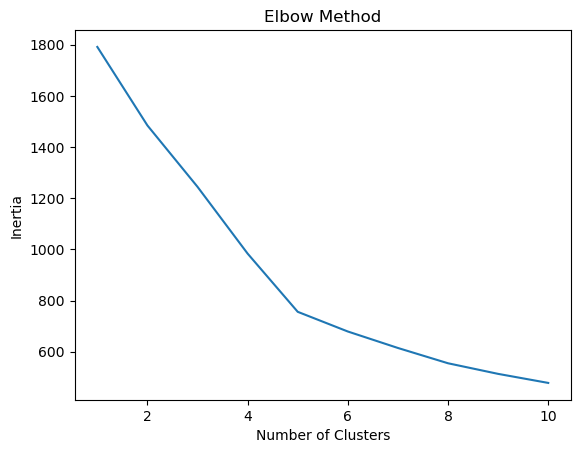

In [20]:
#matplotlib.use('TkAgg')
plt.plot(k_values, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

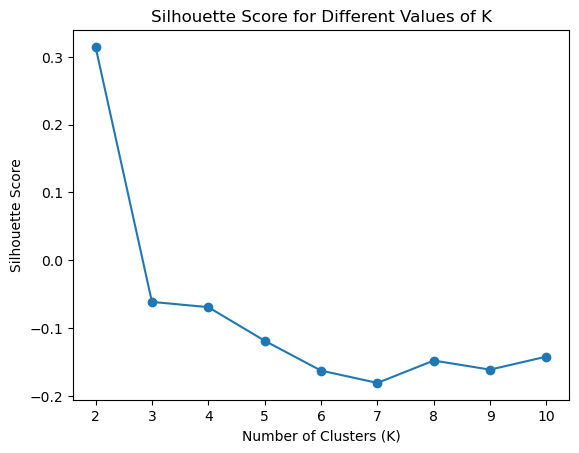

The optimal number of clusters (K) using silhouette_scores is: 2


In [21]:
silhouette_scores = []
range_of_k = range(2, 11)  
for k in range_of_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(range_of_k, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = range_of_k[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters (K) using silhouette_scores is: {optimal_k}")

In [22]:
optimal_k = 4  #Optimum Clusters using Elbow method looks 4 so making 4 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
main_file['cluster'] = kmeans.fit_predict(scaled_features)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'PCA Component 2')

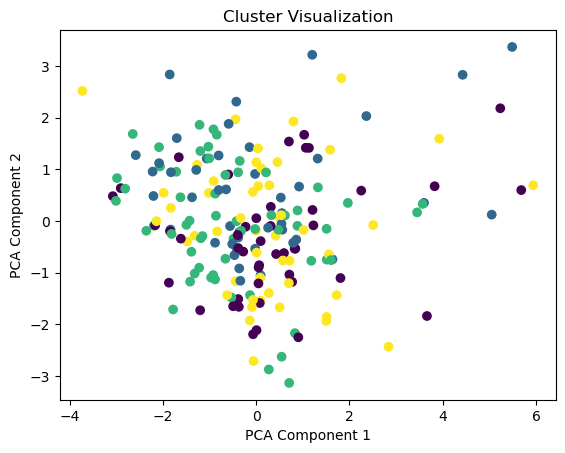

In [23]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=main_file['cluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [24]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)


In [25]:
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features.columns)


In [26]:
# Save the cluster centers to a CSV file
cluster_centers_df.to_csv('cluster_centers_age_dropped_2.csv', index=False)

In [27]:
# Clustering Metrics
# Davies-Bouldin Index and Silhouette Score to evaluate clustering
from sklearn.metrics import davies_bouldin_score, silhouette_score

db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Davies-Bouldin Index: 1.225505661041526
Silhouette Score: 0.3573932669439232
